In [11]:
import torch
import torchvision

In [12]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [13]:
import os
import requests
import tarfile
from pathlib import Path
data_dir=Path('data')
data_dir.mkdir(parents=True,exist_ok=True)
archieve_file=data_dir/'images.tar.gz'
url='https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'
# commented as i do not want to download everytime

# if not archieve_file.is_file():
#     print(f"Downloading from the {url}")
#     request=requests.get(url)
#     with open(archieve_file,'wb') as f:
#         for chunk in request.iter_content(chunk_size=8192):
#             if chunk:
#                 f.write(chunk)
#     print("Downloading completed")

# with tarfile.open(archieve_file,"r:gz") as f:
#     f.extractall(path=data_dir/'images_data')

In [14]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.8905448].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.4285715].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.980906..0.8960528].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7582842..0.7925056].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


The length of the dataset is 80799
The classes : ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwi

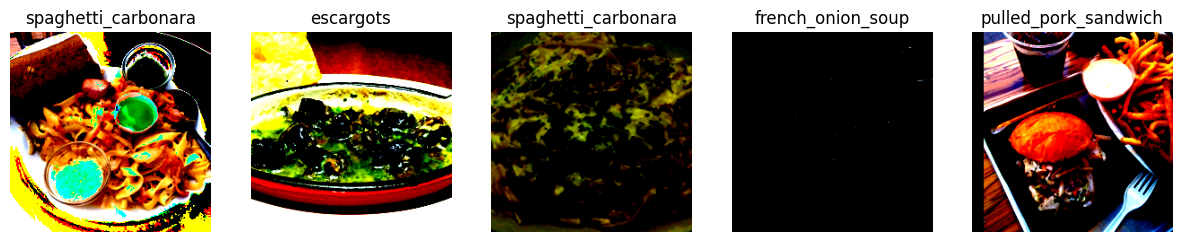

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.4110641].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9481792..2.2710083].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781512..2.64].


------------------------------------------------------------------------------------------------------------------------------------------------------
The length of the dataset is 20200
The classes : ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamo

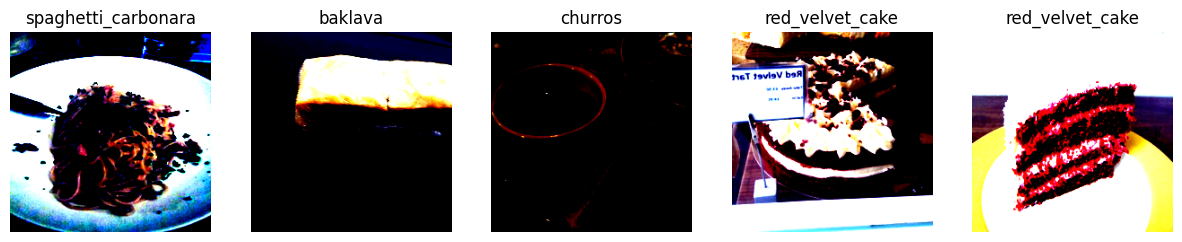

------------------------------------------------------------------------------------------------------------------------------------------------------


In [15]:
# so know make the dataset
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
from random import sample
from torchvision import transforms
from PIL import Image
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, Subset, random_split
from  torchvision.transforms import TrivialAugmentWide
def get_info_dataset(dataset):
    # Handle nested Subsets - keep going until we get to the original dataset
    underlying_dataset = dataset
    while isinstance(underlying_dataset, Subset):
        underlying_dataset = underlying_dataset.dataset
    
    print(f"The length of the dataset is {len(dataset)}")
    classes = underlying_dataset.classes
    print(f"The classes : {classes}")
    classes_to_idx = underlying_dataset.class_to_idx
    print(f"The classses_to_idx: {classes_to_idx}")
    image,label = dataset[0]  # Use original dataset (your subset)
    show_samples(dataset=dataset,num=5)  # Pass original dataset (your subset)
    print("-"*150)

def show_samples(dataset:Dataset,num:int=5):
    # Handle nested Subsets - keep going until we get to the original dataset
    underlying_dataset = dataset
    while isinstance(underlying_dataset, Subset):
        underlying_dataset = underlying_dataset.dataset
    
    classes = underlying_dataset.classes
    plt.figure(figsize=(15,5))
    random_sample = sample(range(len(dataset)),k=5)
    for index,idx in enumerate(random_sample):
        plt.subplot(1,num,index+1)
        image,label = dataset[idx]  # Use original dataset for indexing
        plt.imshow(image.permute(1,2,0))
        plt.title(classes[label])
        plt.axis(False)
    plt.show()
images_root=r"C:\Users\DELL\OneDrive\Documents\AI_Practise\Pytorch\Food_Vision\data\images_data\food-101\images"
train_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
test_transform=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
def is_valid(path):
    try:
        with Image.open(path) as img:
            img.verify()
        return True
    except:
        return False
full_train=ImageFolder(images_root,transform=train_transform,is_valid_file=is_valid)
# ... existing code ...
n=len(full_train)
n_train=int(0.8*n)
n_test=n-n_train
g=torch.Generator().manual_seed(42)
train_dataset,test_subset_index=random_split(full_train,[n_train,n_test],generator=g)

# ... existing code ...

# Now take subsets of these for smaller training
# here can do like train_size_small=int(len(train_dataset)/10 to get the 10% of the data)
train_size_small=int(len(train_dataset))
test_size_small=int(len(test_subset_index))
 
train_dataset, _ = random_split(train_dataset, [train_size_small, len(train_dataset)-train_size_small])
test_subset_small, _ = random_split(test_subset_index, [test_size_small, len(test_subset_index)-test_size_small])

# Fix: Use the same dataset for test_subset_small and test_dataset
test_dataset = test_subset_small  # Just use the subset directly

# ... existing code ...
get_info_dataset(train_dataset)
get_info_dataset(test_dataset)


In [42]:
# now split it into the chunks and using the dataloader
from torch.utils.data import DataLoader
train_dataloader=DataLoader(train_dataset,batch_size=32,shuffle=True,pin_memory=True,num_workers=4)
test_dataloader=DataLoader(test_dataset,batch_size=32,shuffle=False,pin_memory=True,num_workers=4)
# val_dataloader=DataLoader(val_data,batch_size=32,shuffle=True,pin_memory=True,num_workers=4)

In [17]:
image,label=next(iter(train_dataloader))
print(image.shape)
print(label)

torch.Size([32, 3, 224, 224])
tensor([ 57,  39,   6, 100,  69,  41,   4,  95,  65,  68,  10,  75,  67,  63,
         36,  13,  96,  67,  66,  84,  67,  60,  41,  79,  47,  40,  10,  63,
         48,  71,  27,  78])


In [43]:
# now make the vit model
from torch import nn
class PatchEmbeddings(nn.Module):
    def __init__(self,patch_size:int=16,in_channels:int=3,emd_size:int=768):
        super().__init__()
        self.convlayer=nn.Conv2d(in_channels=in_channels,out_channels=emd_size,stride=patch_size,kernel_size=patch_size)
    def forward(self,x:torch.Tensor):
        x=self.convlayer(x)
        x=x.flatten(2)
        x=x.transpose(1,2)
        return x

In [44]:
# how is the shape calculated
# if the shape is (batch_size,color channel,height,width) and the patch size is p
# then the shape changes to the (batch_size,no of patches((height*width)/p**2,p*p*no of color channels)
batch_test=next(iter(train_dataloader))[0]
patchEmbeder=PatchEmbeddings(16,3,768)
embedded_tensor=patchEmbeder(batch_test)

In [45]:
embedded_tensor.shape

torch.Size([32, 196, 768])

In [46]:
feature_emb=768
class_token=nn.Parameter(torch.randn(32,1,feature_emb))
class_token.shape

torch.Size([32, 1, 768])

In [47]:
tensor_train_class=torch.cat([class_token,embedded_tensor],dim=1)
tensor_train_class

tensor([[[ 8.0651e-01, -8.5333e-01, -1.1999e+00,  ..., -3.6138e-01,
          -1.3171e+00, -4.5233e-01],
         [ 2.1597e-01,  2.3034e-02, -8.7155e-01,  ..., -1.0786e+00,
          -7.1494e-01, -4.9189e-01],
         [-5.5816e-02, -2.3087e-01, -1.1798e+00,  ..., -2.1375e-01,
          -4.8100e-01, -6.8648e-01],
         ...,
         [-1.8295e-01,  3.1087e-01,  1.2128e+00,  ...,  1.4799e+00,
           8.8118e-01,  3.4678e-01],
         [-1.9682e-01,  3.1503e-01,  1.2116e+00,  ...,  1.4618e+00,
           8.9996e-01,  3.5144e-01],
         [-1.9690e-01,  3.7374e-01,  9.1558e-01,  ...,  8.8086e-01,
           6.4323e-01,  3.7722e-01]],

        [[-1.5620e+00, -7.7566e-01,  3.1903e-01,  ...,  2.8683e-01,
           1.0504e-01,  6.6776e-01],
         [ 2.4616e-01, -3.0767e-01,  9.9793e-01,  ..., -1.2635e+00,
           3.9746e-01,  5.4571e-01],
         [ 3.9879e-01, -4.2758e-01, -4.4712e-01,  ..., -1.4686e+00,
          -6.6875e-01,  1.3652e-01],
         ...,
         [-3.3733e-01,  3

In [48]:
class TransformerEncoder(nn.Module):
    def __init__(self,embed_dim,num_heads,mlp_dim,dropout=0.1):
        super().__init__()
        self.norm1=nn.LayerNorm(embed_dim)
        self.msa=nn.MultiheadAttention(embed_dim,num_heads,dropout)
        self.norm2=nn.LayerNorm(embed_dim)
        self.mlp=nn.Sequential(
            nn.Linear(embed_dim,mlp_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(mlp_dim,embed_dim),
            nn.Dropout(dropout)
        )
    def forward(self,x:torch.Tensor):
        y=self.norm1(x)
        y,_=self.msa(query=y,key=y,value=y)
        x=x+y
        y=self.norm2(x)
        y=self.mlp(y)
        x=x+y
        return x
    

In [49]:
class VisionTransformer(nn.Module):
    def __init__(self,image_size:int=224,patch_size:int=16,
                 in_channels:int=3,num_classes:int=1000,
                 embed_dim:int=768,depth:int=6,num_head:int=8,
                 mlp_dim:int=2048,dropout:int=0.1):
        super().__init__()
        self.patch_embeddings=PatchEmbeddings(patch_size=patch_size,in_channels=in_channels,emd_size=768)
        num_patches=int((image_size/patch_size)**2)
        self.cls_token=nn.Parameter(torch.randn(1,1,embed_dim))
        self.pos_embed=nn.Parameter(torch.randn(1,num_patches+1,embed_dim))
        self.dropout=nn.Dropout(dropout)
        self.transformer_blocks=nn.ModuleList([TransformerEncoder(embed_dim=embed_dim,num_heads=num_head,mlp_dim=mlp_dim,dropout=dropout) for _ in range(depth)])
        self.mlp_head=nn.Linear(embed_dim,num_classes)
        self._init_weights()
    def _init_weights(self):
        nn.init.trunc_normal_(self.pos_embed,std=0.02)
        nn.init.trunc_normal_(self.cls_token,std=0.02)
        nn.init.trunc_normal_(self.mlp_head.weight,std=0.02)
        if self.mlp_head.bias is not None:
            nn.init.zeros_(self.mlp_head.bias)
    def forward(self,x):
        B=x.shape[0]
        x=self.patch_embeddings(x)
        cls_tokens=self.cls_token.expand(B,-1,-1)
        x=torch.cat((cls_tokens,x),dim=1)
        x=x+self.pos_embed
        x=self.dropout(x)
        for block in self.transformer_blocks:
            x=block(x)
        cls_output=x[:,0]
        # print(cls_output.shape)
        out=self.mlp_head(cls_output)
        return out

In [50]:
vit_custom=VisionTransformer()
pred=vit_custom(image)
prediction=torch.argmax(pred,dim=1)
print(prediction)
print(label)
(prediction==label).sum().item()

tensor([506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 506, 693,
        506, 693, 506, 506, 816, 506, 816, 506, 506, 506, 506, 506, 506, 693,
        506, 816, 506, 816])
tensor([ 57,  39,   6, 100,  69,  41,   4,  95,  65,  68,  10,  75,  67,  63,
         36,  13,  96,  67,  66,  84,  67,  60,  41,  79,  47,  40,  10,  63,
         48,  71,  27,  78])


0

In [51]:
def save_model(model:nn.Module,optimizer:torch.optim.Optimizer,epochs:int,file_path:str,dataset:Dataset):
    underlying_dataset=dataset
    while isinstance(underlying_dataset,Subset):
        underlying_dataset=underlying_dataset.dataset
    checkpoints={
        "model_dict":model.state_dict(),
        "optimizer":optimizer.state_dict(),
        "epochs":epochs,
        'classes':underlying_dataset.classes,
    }
    torch.save(checkpoints,file_path)
    print(f"Checkpoint saved as epoch: {epochs}")
def load_model(model:nn.Module,optimizer:torch.optim.Optimizer,file_name:str):
    if os.path.exists(file_name):
        checkpoints=torch.load(file_name)
        model.load_state_dict(checkpoints['model_dict'])
        try:
            optimizer.load_state_dict(checkpoints['optimizer'])
            epochs=checkpoints['epochs']    
            return epochs
        except ValueError as e  :
            print(f"Error loading optimizer state: {e}")
            return 0
    else:
        print("Path does not exist")
        return 0

In [27]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=vit_custom.parameters(),lr=0.001)

In [52]:
# now train the model
from torch import nn
def train_model(train_dataloader:torch.utils.data.dataloader,
                model:nn.Module,optimizer:torch.optim.Optimizer,
                loss_fn:nn.Module,device:torch.device,epochs:int,save_file_name:str,
                train_data:torch.utils.data.dataset.Subset):
    model=model.to(device)
    start_epoch=load_model(model,optimizer,save_file_name)
    for epoch in range(start_epoch,epochs):
        model.train()
        average_loss,average_accuracy,total_samples=0,0,0
        for i,(x,y) in enumerate(train_dataloader):
            x=x.to(device)
            y=y.to(device)
            y_pred_logits=model(x)
            y_pred=torch.argmax(y_pred_logits,dim=1)
            optimizer.zero_grad()
            loss=loss_fn(y_pred_logits,y)
            loss.backward()
            optimizer.step()
            average_loss+=loss.item()
            accuracy=(y_pred==y).sum().item()
            average_accuracy+=accuracy
            total_samples+=y.shape[0]
            # print(f"Inner accuracy : {accuracy} , Inner Loss : {loss}")
        average_loss=average_loss/total_samples
        average_accuracy=average_accuracy/total_samples
        print(f"Average accuracy : {average_accuracy}")
        print(f"Average Loss : {average_loss}")
        save_model(vit_custom,optimizer,epoch,save_file_name)

In [53]:
# commented as we do not want to train everytime 
# train_model(train_dataloader,vit_custom,optimizer,loss_fn,device,20,"vit_custom.pth",train_dataloader)

In [54]:
from torchinfo import summary
model_summary=summary(model=vit_custom,input_size=(32,3,224,224))
model_summary

Layer (type:depth-idx)                   Output Shape              Param #
VisionTransformer                        [32, 1000]                152,064
├─PatchEmbeddings: 1-1                   [32, 196, 768]            --
│    └─Conv2d: 2-1                       [32, 768, 14, 14]         590,592
├─Dropout: 1-2                           [32, 197, 768]            --
├─ModuleList: 1-3                        --                        --
│    └─TransformerEncoder: 2-2           [32, 197, 768]            --
│    │    └─LayerNorm: 3-1               [32, 197, 768]            1,536
│    │    └─MultiheadAttention: 3-2      [32, 197, 768]            2,362,368
│    │    └─LayerNorm: 3-3               [32, 197, 768]            1,536
│    │    └─Sequential: 3-4              [32, 197, 768]            3,148,544
│    └─TransformerEncoder: 2-3           [32, 197, 768]            --
│    │    └─LayerNorm: 3-5               [32, 197, 768]            1,536
│    │    └─MultiheadAttention: 3-6      [32, 197, 7

In [55]:
# use the inbuilt one
import torch
from torchvision.models import vit_b_16, ViT_B_16_Weights
from torch import nn
weights = ViT_B_16_Weights.DEFAULT
model_inbuilt = vit_b_16(weights=weights)

# First, fix the model's final layer
model_inbuilt.heads.head = nn.Linear(model_inbuilt.heads.head.in_features, 101)

# Then freeze the encoder, but keep the head trainable
for name, param in model_inbuilt.named_parameters():
    if 'heads' not in name:  # Freeze everything except the head
        param.requires_grad = False
    else:  # Keep the head trainable
        param.requires_grad = True

# Use lower learning rate for fine-tuning
inbuilt_loss_fn = nn.CrossEntropyLoss()
inbuilt_optimizer = torch.optim.Adam(
    filter(lambda p: p.requires_grad, model_inbuilt.parameters()),  # Only trainable parameters
    lr=0.01  # ✅ Much lower learning rate
)

In [32]:
# we do not want to train evertime
# train_model(train_dataloader,model_inbuilt,inbuilt_optimizer,inbuilt_loss_fn,device,20,"vit_inbuilt.pth",train_dataloader)

In [56]:
from torchinfo import summary
vit_inbuilt_summmary=summary(model=model_inbuilt,input_size=(32,3,224,224))
vit_inbuilt_summmary

Layer (type:depth-idx)                        Output Shape              Param #
VisionTransformer                             [32, 101]                 768
├─Conv2d: 1-1                                 [32, 768, 14, 14]         (590,592)
├─Encoder: 1-2                                [32, 197, 768]            151,296
│    └─Dropout: 2-1                           [32, 197, 768]            --
│    └─Sequential: 2-2                        [32, 197, 768]            --
│    │    └─EncoderBlock: 3-1                 [32, 197, 768]            (7,087,872)
│    │    └─EncoderBlock: 3-2                 [32, 197, 768]            (7,087,872)
│    │    └─EncoderBlock: 3-3                 [32, 197, 768]            (7,087,872)
│    │    └─EncoderBlock: 3-4                 [32, 197, 768]            (7,087,872)
│    │    └─EncoderBlock: 3-5                 [32, 197, 768]            (7,087,872)
│    │    └─EncoderBlock: 3-6                 [32, 197, 768]            (7,087,872)
│    │    └─EncoderBlock: 3-

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..-1.0375599].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0357141..2.5179958].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..1.5942485].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877128].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Cli

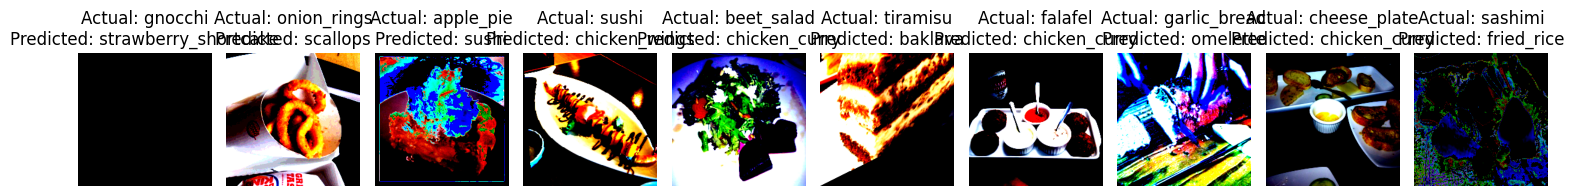

In [57]:
# now create a function to show images and label as actual label and the predicted label
import random
import matplotlib.pyplot as plt
def visualize_prediction(model: nn.Module, loss_fn: nn.Module,
                         dataset: torch.utils.data.Dataset, k: int,device):
    model.eval()
    
    # Get classes from the original dataset
    new_dataset=dataset
    while isinstance(new_dataset,Subset):
        new_dataset=new_dataset.dataset
    classes=new_dataset.classes
    
    plt.figure(figsize=(15, 5))
    random_sample = random.sample(range(len(dataset)), k=k)
    
    for index, idx in enumerate(random_sample):
        image, label = dataset[idx]
        image_tensor = image.unsqueeze(0)
        
        with torch.inference_mode():
            image_tensor = image_tensor.to(device)
            y_pred_logits = model(image_tensor)
            y_pred = torch.argmax(y_pred_logits, dim=1).item()
        
        plt.subplot(2, k, index+1)
        plt.imshow(image.permute(1, 2, 0))
        plt.title(f"Actual: {classes[label]}\nPredicted: {classes[y_pred]}")
        plt.axis(False)
    
    plt.tight_layout()
    plt.show()

        
visualize_prediction(model_inbuilt,inbuilt_loss_fn,test_dataset,10,device)

In [60]:
# now train the model_inbuilt
# !pip install tensorboard
from this import d
from torch import nn
from torch.utils.tensorboard import SummaryWriter
def train_model_write(train_dataloader:torch.utils.data.dataloader,
                model:nn.Module,optimizer:torch.optim.Optimizer,
                loss_fn:nn.Module,device:torch.device,epochs:int,save_file_name:str,
                train_data:torch.utils.data.dataset.Subset,
                test_dataloader:torch.utils.data.dataloader,
                test_data:torch.utils.data.dataset.Subset,writer:SummaryWriter):
    model=model.to(device)
    start_epoch=load_model(model,optimizer,save_file_name)
    writer.add_graph(model,input_to_model=torch.randn(32,3,224,224).to(device))
    for epoch in range(start_epoch,epochs):
        model.train()
        average_loss,average_accuracy,train_size=0,0,0
        for i,(x,y) in enumerate(train_dataloader):
            x=x.to(device)
            y=y.to(device)
            y_pred_logits=model(x)
            y_pred=torch.argmax(y_pred_logits,dim=1)
            optimizer.zero_grad()
            loss=loss_fn(y_pred_logits,y)
            loss.backward()
            optimizer.step()
            average_loss+=loss.item()
            accuracy=(y_pred==y).sum().item()
            average_accuracy+=accuracy
            train_size+=y.shape[0]
            # print(f"Inner accuracy : {accuracy} , Inner Loss : {loss}")
        average_loss=average_loss/train_size
        average_accuracy=average_accuracy/train_size
        model.eval()
        with torch.inference_mode():
            test_average_loss,test_average_accuracy,test_size_size=0,0,0
            for i,(x,y) in enumerate(test_dataloader):
                x=x.to(device)
                y=y.to(device)
                test_y_pred_logits=model(x)
                test_y_pred=torch.argmax(test_y_pred_logits,dim=1)
                loss=loss_fn(test_y_pred_logits,y)
                test_average_loss+=loss.item()
                accuracy=(test_y_pred==y).sum().item()
                test_average_accuracy+=accuracy
                test_size_size+=y.shape[0]
            test_average_loss=test_average_loss/test_size_size
            test_average_accuracy=test_average_accuracy/test_size_size
        writer.add_scalars('Loss',{
                  'train':average_loss,
                  'test':test_average_loss,
        }
                  ,global_step=epoch
        )
        writer.add_scalars('Accuracy',
                 {
                    'train_accuracy':average_accuracy,
                    'test_accuracy':test_average_accuracy
                }
                ,
                global_step=epoch
            )
        print(f"Average accuracy : {average_accuracy}")
        print(f"Average Loss : {average_loss}")
        print(f"Test Average accuracy : {test_average_accuracy}")
        print(f"Test Average Loss : {test_average_loss}")
        save_model(model,optimizer,epoch,save_file_name,dataset=train_data)

In [ ]:
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
timestamp=datetime.now().strftime("%Y%m%d_%H%M%S")
writer=SummaryWriter(f'runs/custom_vit_{timestamp}')
inbuilt_writer=SummaryWriter(f'runs/inbuilt_vit_{timestamp}')
# train_model_write(train_dataloader,vit_custom,optimizer,loss_fn,device,
# 20,"vit_custom.pth",train_dataset,test_dataloader,test_dataset,writer)
INBUILT_CHECKPOINT = "model.pth"
train_model_write(train_dataloader,model_inbuilt,inbuilt_optimizer,inbuilt_loss_fn,device,
50,INBUILT_CHECKPOINT,train_dataset,test_dataloader,test_dataset,writer)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18308\1859378576.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoints=torch.load(file_name)
c:\Users\DELL\miniconda3\e

Average accuracy : 0.6106634983106226
Average Loss : 0.09976540551825747
Test Average accuracy : 0.5723762376237623
Test Average Loss : 0.12306751291940708
Checkpoint saved as epoch: 1
Average accuracy : 0.6158615824453273
Average Loss : 0.10153572158333447
Test Average accuracy : 0.5751485148514851
Test Average Loss : 0.12325751056175421
Checkpoint saved as epoch: 2
Average accuracy : 0.6183368606047105
Average Loss : 0.10171334022687735
Test Average accuracy : 0.5893564356435643
Test Average Loss : 0.12145160102018035
Checkpoint saved as epoch: 3
